In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import KNNImputer

#model selection from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#ensemble
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,confusion_matrix
#pca
from sklearn.decomposition import PCA
#data_balance
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
#warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
data_dictionary=pd.read_csv(r'C:\Users\Admin\Desktop\PGP project B&F\Banking Finance - Data_Dictionary.csv')
data_dictionary

,Unnamed: 0,Variable Name,Description,Unnamed: 2
0,0,UniqueID,Identifier for customers,NaN
1,1,loan_default,Payment default in the first EMI on due date,NaN
2,2,disbursed_amount,Amount of Loan disbursed,NaN
3,3,asset_cost,Cost of the Asset,NaN
4,4,ltv,Loan to Value of the asset,NaN
5,5,branch_id,Branch where the loan was disbursed,NaN
6,6,supplier_id,Vehicle Dealer where the loan was disbursed,NaN
7,7,manufacturer_id,"Vehicle manufacturer(Hero, Honda, TVS etc.)",NaN
8,8,Current_pincode,Current pincode of the customer,NaN
9,9,Date.of.Birth,Date of birth of the customer,NaN


In [4]:
bf_all=pd.read_csv(r'C:\Users\Admin\Desktop\PGP project B&F\Banking Finance - DataSet.csv')

In [5]:
bf_all.tail()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
233149,626432,63213,105405,60.72000,34,20700,48,1050,1/8/1988,Salaried,26-10-18,6,3705,1,0,0,1,0,0,735,D-Very Low Risk,4,3,0,390443,416133,416133,0,0,0,0,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,73651,100600,74.95000,34,23775,51,990,5/12/1988,Self employed,23-10-18,6,3705,1,0,0,1,0,0,825,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,33484,71212,48.45000,77,22186,86,2299,1/6/1976,Salaried,24-10-18,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,34259,73286,49.10000,77,22186,86,2299,26-03-94,Salaried,29-09-18,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233153,630213,75751,116009,66.81000,77,22186,86,2299,18-02-84,Salaried,27-10-18,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [6]:
bf_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [7]:
bf_all.describe().T

,count,mean,std,min,25%,50%,75%,max
UniqueID,233154.00000,535917.57338,68315.69371,417428.00000,476786.25000,535978.50000,595039.75000,671084.00000
disbursed_amount,233154.00000,54356.99353,12971.31417,13320.00000,47145.00000,53803.00000,60413.00000,990572.00000
asset_cost,233154.00000,75865.06814,18944.78129,37000.00000,65717.00000,70946.00000,79201.75000,1628992.00000
ltv,233154.00000,74.74653,11.45664,10.03000,68.88000,76.80000,83.67000,95.00000
branch_id,233154.00000,72.93609,69.83499,1.00000,14.00000,61.00000,130.00000,261.00000
supplier_id,233154.00000,19638.63504,3491.94957,10524.00000,16535.00000,20333.00000,23000.00000,24803.00000
manufacturer_id,233154.00000,69.02805,22.14130,45.00000,48.00000,86.00000,86.00000,156.00000
Current_pincode_ID,233154.00000,3396.88025,2238.14750,1.00000,1511.00000,2970.00000,5677.00000,7345.00000
State_ID,233154.00000,7.26224,4.48223,1.00000,4.00000,6.00000,10.00000,22.00000
Employee_code_ID,233154.00000,1549.47715,975.26128,1.00000,713.00000,1451.00000,2362.00000,3795.00000


In [8]:
bf_all.shape

(233154, 41)

In [9]:
bf_all.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [10]:
bf_all['loan_default'].value_counts(dropna=True)

0    182543
1     50611
Name: loan_default, dtype: int64

It is imbalanced data

In [11]:
bf_all.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55000,67,22807,45,1441,1/1/1984,Salaried,3/8/2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23000,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63000,67,22807,45,1497,24-08-85,Self employed,1/8/2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48000,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39000,67,22807,45,1495,9/12/1977,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [12]:
bf_all=bf_all.drop(['UniqueID', 'branch_id','supplier_id', 'Current_pincode_ID','State_ID', 'Employee_code_ID', 'MobileNo_Avl_Flag'],axis=1)

In [13]:
def duration(dur):
    yrs = int(dur.split(' ')[0].replace('yrs',''))
    mon = int(dur.split(' ')[1].replace('mon',''))
    return yrs*12+mon

In [14]:
bf_all['AVERAGE_ACCT_AGE'] = bf_all['AVERAGE.ACCT.AGE'].apply(duration)
bf_all['CREDIT_HISTORY_LENGTH'] = bf_all['CREDIT.HISTORY.LENGTH'].apply(duration)
bf_all.drop(['AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH'],axis=1,inplace=True)

In [15]:
bf_all.head()

,disbursed_amount,asset_cost,ltv,manufacturer_id,Date.of.Birth,Employment.Type,DisbursalDate,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH
0,50578,58400,89.55000,45,1/1/1984,Salaried,3/8/2018,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,47145,65550,73.23000,45,31-07-85,Self employed,26-09-18,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,0,1,23,23
2,53278,61360,89.63000,45,24-08-85,Self employed,1/8/2018,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,57513,66113,88.48000,45,30-12-93,Self employed,26-10-18,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,1,1,8,15
4,52378,60300,88.39000,45,9/12/1977,Self employed,26-09-18,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [16]:
bf_all['Date.of.Birth'].head()

0     1/1/1984
1     31-07-85
2     24-08-85
3     30-12-93
4    9/12/1977
Name: Date.of.Birth, dtype: object

In [17]:
bf_all['DisbursalDate'].head()

0    3/8/2018
1    26-09-18
2    1/8/2018
3    26-10-18
4    26-09-18
Name: DisbursalDate, dtype: object

In [18]:
def calculate_age(dob):
    if int(dob[-2:]) < 19:
       year = int('20' + dob[-2:])
    else:
       year = int('19' + dob[-2:])
    return(pd.to_datetime('today').year-year)
bf_all['Age']=bf_all['Date.of.Birth'].apply(calculate_age)

In [19]:
bf_all['Age'].dtype

dtype('int64')

In [20]:
bf_all=bf_all.drop(['DisbursalDate','Date.of.Birth',],axis=1)

In [ ]:
#df['TODAY']=pd.to_datetime(datetime.date.today())

#df['AGE']=df['TODAY']-df['DATE_OF_BIRTH']
#new = df["AGE"].astype(str).str.split(" ", n = 1, expand = True)
#df['AGE']=new[0].astype(int)

#df['LOAN_AGE']=df['TODAY']-df['DISBURSAL_DATE']
#new = df["LOAN_AGE"].astype(str).str.split(" ", n = 1, expand = True)
#df['LOAN_AGE']=new[0].astype(int)

In [21]:
bf_all['Employment.Type'].value_counts(dropna=False)

Self employed    127635
Salaried          97858
NaN                7661
Name: Employment.Type, dtype: int64

In [22]:
bf_all['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [23]:
bf_all['Employment.Type']=bf_all['Employment.Type'].replace({'Self employed':0, 'Salaried':1,np.nan:2})

In [24]:
bf_all['Employment.Type'].isnull().sum()

0

In [25]:
list(zip(bf_all.columns,bf_all.dtypes,bf_all.nunique())) 

[('disbursed_amount', dtype('int64'), 24565),
 ('asset_cost', dtype('int64'), 46252),
 ('ltv', dtype('float64'), 6579),
 ('manufacturer_id', dtype('int64'), 11),
 ('Employment.Type', dtype('int64'), 3),
 ('Aadhar_flag', dtype('int64'), 2),
 ('PAN_flag', dtype('int64'), 2),
 ('VoterID_flag', dtype('int64'), 2),
 ('Driving_flag', dtype('int64'), 2),
 ('Passport_flag', dtype('int64'), 2),
 ('PERFORM_CNS.SCORE', dtype('int64'), 573),
 ('PERFORM_CNS.SCORE.DESCRIPTION', dtype('O'), 20),
 ('PRI.NO.OF.ACCTS', dtype('int64'), 108),
 ('PRI.ACTIVE.ACCTS', dtype('int64'), 40),
 ('PRI.OVERDUE.ACCTS', dtype('int64'), 22),
 ('PRI.CURRENT.BALANCE', dtype('int64'), 71341),
 ('PRI.SANCTIONED.AMOUNT', dtype('int64'), 44390),
 ('PRI.DISBURSED.AMOUNT', dtype('int64'), 47909),
 ('SEC.NO.OF.ACCTS', dtype('int64'), 37),
 ('SEC.ACTIVE.ACCTS', dtype('int64'), 23),
 ('SEC.OVERDUE.ACCTS', dtype('int64'), 9),
 ('SEC.CURRENT.BALANCE', dtype('int64'), 3246),
 ('SEC.SANCTIONED.AMOUNT', dtype('int64'), 2223),
 ('SEC.D

In [26]:
for col in bf_all.select_dtypes(['object']).columns:
    print(col,':',bf_all[col].nunique())

PERFORM_CNS.SCORE.DESCRIPTION : 20


In [27]:
cat_vars=bf_all.select_dtypes(['object']).columns
cat_vars

Index(['PERFORM_CNS.SCORE.DESCRIPTION'], dtype='object')

In [28]:
for col in cat_vars:
    print('-----', col, '-----')
    print(bf_all[col].nunique()) # No. of unique values on the categorical col
    print(bf_all[col].unique()) # The actual unique values
    print(bf_all[col].value_counts()) 

----- PERFORM_CNS.SCORE.DESCRIPTION -----
20
['No Bureau History Available' 'I-Medium Risk' 'L-Very High Risk'
 'A-Very Low Risk' 'Not Scored: Not Enough Info available on the customer'
 'D-Very Low Risk' 'M-Very High Risk' 'B-Very Low Risk' 'C-Very Low Risk'
 'E-Low Risk' 'H-Medium Risk' 'F-Low Risk' 'K-High Risk'
 'Not Scored: No Activity seen on the customer (Inactive)'
 'Not Scored: Sufficient History Not Available'
 'Not Scored: No Updates available in last 36 months' 'G-Low Risk'
 'J-High Risk' 'Not Scored: Only a Guarantor'
 'Not Scored: More than 50 active Accounts found']
No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk      

In [29]:
bf_all['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts(normalize=True)*100

No Bureau History Available                               50.15998
C-Very Low Risk                                            6.88172
A-Very Low Risk                                            6.05780
D-Very Low Risk                                            4.87146
B-Very Low Risk                                            3.94632
M-Very High Risk                                           3.76404
F-Low Risk                                                 3.63923
K-High Risk                                                3.55001
H-Medium Risk                                              2.94012
E-Low Risk                                                 2.49663
I-Medium Risk                                              2.38340
G-Low Risk                                                 1.71046
Not Scored: Sufficient History Not Available               1.61481
J-High Risk                                                1.60752
Not Scored: Not Enough Info available on the customer      1.5

In [30]:
k=bf_all['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()
for col in k.axes[0][0:16]:
    var_name = 'CNS_'+col.replace(' ','_')
    print(var_name)
    bf_all[var_name] = np.where(bf_all['PERFORM_CNS.SCORE.DESCRIPTION']==col,1,0)

CNS_No_Bureau_History_Available
CNS_C-Very_Low_Risk
CNS_A-Very_Low_Risk
CNS_D-Very_Low_Risk
CNS_B-Very_Low_Risk
CNS_M-Very_High_Risk
CNS_F-Low_Risk
CNS_K-High_Risk
CNS_H-Medium_Risk
CNS_E-Low_Risk
CNS_I-Medium_Risk
CNS_G-Low_Risk
CNS_Not_Scored:_Sufficient_History_Not_Available
CNS_J-High_Risk
CNS_Not_Scored:_Not_Enough_Info_available_on_the_customer
CNS_Not_Scored:_No_Activity_seen_on_the_customer_(Inactive)


In [31]:
bf_all.drop('PERFORM_CNS.SCORE.DESCRIPTION',axis=1,inplace=True)

In [32]:
bf_all.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'manufacturer_id',
       'Employment.Type', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES',
       'loan_default', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'Age',
       'CNS_No_Bureau_History_Available', 'CNS_C-Very_Low_Risk',
       'CNS_A-Very_Low_Risk', 'CNS_D-Very_Low_Risk', 'CNS_B-Very_Low_Risk',
       'CNS_M-Very_High_Risk', 'CNS_F-Low_Risk', 'CNS_K-High_Risk',
       'CNS_H-Medium_Risk', 'CNS_E-Low_Risk', 'CNS_I-Medium_Risk',
       'CNS_G-Lo

In [33]:
bf_all.head()

,disbursed_amount,asset_cost,ltv,manufacturer_id,Employment.Type,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,Age,CNS_No_Bureau_History_Available,CNS_C-Very_Low_Risk,CNS_A-Very_Low_Risk,CNS_D-Very_Low_Risk,CNS_B-Very_Low_Risk,CNS_M-Very_High_Risk,CNS_F-Low_Risk,CNS_K-High_Risk,CNS_H-Medium_Risk,CNS_E-Low_Risk,CNS_I-Medium_Risk,CNS_G-Low_Risk,CNS_Not_Scored:_Sufficient_History_Not_Available,CNS_J-High_Risk,CNS_Not_Scored:_Not_Enough_Info_available_on_the_customer,CNS_Not_Scored:_No_Activity_seen_on_the_customer_(Inactive)
0,50578,58400,89.55000,45,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,47145,65550,73.23000,45,0,1,0,0,0,0,598,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,0,1,23,23,35,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,53278,61360,89.63000,45,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,57513,66113,88.48000,45,0,1,0,0,0,0,305,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,1,1,8,15,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,52378,60300,88.39000,45,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,43,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
bf_all.loc[:, 'NO_OF_ACCTS']=bf_all['PRI.NO.OF.ACCTS'] + bf_all['SEC.NO.OF.ACCTS']
bf_all.loc[:,'pri_inactive_accts'] = bf_all['PRI.NO.OF.ACCTS'] - bf_all['PRI.ACTIVE.ACCTS']
bf_all.loc[:,'sec_inactive_accts'] = bf_all['SEC.NO.OF.ACCTS'] - bf_all['SEC.ACTIVE.ACCTS']
bf_all.loc[:, 'ACTIVE_ACCTS']=bf_all['pri_inactive_accts'] + bf_all['sec_inactive_accts']
bf_all.loc[:, 'OVERDUE_ACCTS']=bf_all['PRI.OVERDUE.ACCTS'] + bf_all['SEC.OVERDUE.ACCTS']
bf_all.loc[:, 'CURRENT_BALANCE']=bf_all['PRI.CURRENT.BALANCE'] + bf_all['SEC.CURRENT.BALANCE']
bf_all.loc[:, 'SANCTIONED_AMOUNT']=bf_all['PRI.SANCTIONED.AMOUNT'] + bf_all['SEC.SANCTIONED.AMOUNT']
bf_all.loc[:, 'DISBURSED_AMOUNT']=bf_all['PRI.DISBURSED.AMOUNT'] + bf_all['SEC.DISBURSED.AMOUNT']
bf_all.loc[:, 'INSTALLMENT']=bf_all['PRIMARY.INSTAL.AMT'] + bf_all['SEC.INSTAL.AMT']

In [35]:
bf_all.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'manufacturer_id',
       'Employment.Type', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES',
       'loan_default', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'Age',
       'CNS_No_Bureau_History_Available', 'CNS_C-Very_Low_Risk',
       'CNS_A-Very_Low_Risk', 'CNS_D-Very_Low_Risk', 'CNS_B-Very_Low_Risk',
       'CNS_M-Very_High_Risk', 'CNS_F-Low_Risk', 'CNS_K-High_Risk',
       'CNS_H-Medium_Risk', 'CNS_E-Low_Risk', 'CNS_I-Medium_Risk',
       'CNS_G-Lo

In [36]:
bf_all=bf_all.drop(['PRI.NO.OF.ACCTS','SEC.NO.OF.ACCTS','PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT','SEC.NO.OF.ACCTS','PRI.NO.OF.ACCTS','PRI.DISBURSED.AMOUNT','PRI.ACTIVE.ACCTS', 
            'PRI.OVERDUE.ACCTS','SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT', 'SEC.OVERDUE.ACCTS',
            'SEC.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT','SEC.INSTAL.AMT','disbursed_amount','pri_inactive_accts','sec_inactive_accts'],axis=1)

In [37]:
bf_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   asset_cost                                                   233154 non-null  int64  
 1   ltv                                                          233154 non-null  float64
 2   manufacturer_id                                              233154 non-null  int64  
 3   Employment.Type                                              233154 non-null  int64  
 4   Aadhar_flag                                                  233154 non-null  int64  
 5   PAN_flag                                                     233154 non-null  int64  
 6   VoterID_flag                                                 233154 non-null  int64  
 7   Driving_flag                                                 2331

In [38]:
#bf_all['Flag']=bf_all['Aadhar_flag'].astype('object')+df['PAN_flag'].astype('object')+bf_all['VoterID_flag'].astype('object')+bf_all['Driving_flag'].astype('object')+bf_all['Passport_flag'].astype('object')

In [39]:
bf_all.isnull().sum()

asset_cost                                                     0
ltv                                                            0
manufacturer_id                                                0
Employment.Type                                                0
Aadhar_flag                                                    0
PAN_flag                                                       0
VoterID_flag                                                   0
Driving_flag                                                   0
Passport_flag                                                  0
PERFORM_CNS.SCORE                                              0
SEC.ACTIVE.ACCTS                                               0
NEW.ACCTS.IN.LAST.SIX.MONTHS                                   0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS                            0
NO.OF_INQUIRIES                                                0
loan_default                                                   0
AVERAGE_ACCT_AGE         

In [40]:
bf_all.columns

Index(['asset_cost', 'ltv', 'manufacturer_id', 'Employment.Type',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'PERFORM_CNS.SCORE', 'SEC.ACTIVE.ACCTS',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES', 'loan_default', 'AVERAGE_ACCT_AGE',
       'CREDIT_HISTORY_LENGTH', 'Age', 'CNS_No_Bureau_History_Available',
       'CNS_C-Very_Low_Risk', 'CNS_A-Very_Low_Risk', 'CNS_D-Very_Low_Risk',
       'CNS_B-Very_Low_Risk', 'CNS_M-Very_High_Risk', 'CNS_F-Low_Risk',
       'CNS_K-High_Risk', 'CNS_H-Medium_Risk', 'CNS_E-Low_Risk',
       'CNS_I-Medium_Risk', 'CNS_G-Low_Risk',
       'CNS_Not_Scored:_Sufficient_History_Not_Available', 'CNS_J-High_Risk',
       'CNS_Not_Scored:_Not_Enough_Info_available_on_the_customer',
       'CNS_Not_Scored:_No_Activity_seen_on_the_customer_(Inactive)',
       'NO_OF_ACCTS', 'ACTIVE_ACCTS', 'OVERDUE_ACCTS', 'CURRENT_BALANCE',
       'SANCTIONED_AMOUNT', 'DISBURSED_A

In [41]:
nums=['asset_cost', 'ltv','PERFORM_CNS.SCORE','CNS_No_Bureau_History_Available', 'CNS_C-Very_Low_Risk',
       'CNS_A-Very_Low_Risk', 'CNS_D-Very_Low_Risk', 'CNS_B-Very_Low_Risk',
       'CNS_M-Very_High_Risk', 'CNS_F-Low_Risk', 'CNS_K-High_Risk',
       'CNS_H-Medium_Risk', 'CNS_E-Low_Risk', 'CNS_I-Medium_Risk',
       'CNS_G-Low_Risk', 'CNS_Not_Scored:_Sufficient_History_Not_Available',
       'CNS_J-High_Risk',
       'CNS_Not_Scored:_Not_Enough_Info_available_on_the_customer',
       'CNS_Not_Scored:_No_Activity_seen_on_the_customer_(Inactive)',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO.OF_INQUIRIES','NO_OF_ACCTS', 'ACTIVE_ACCTS',
       'OVERDUE_ACCTS', 'CURRENT_BALANCE', 'SANCTIONED_AMOUNT',
       'DISBURSED_AMOUNT', 'INSTALLMENT','Age']

In [42]:
bf_all['Age'].dtype

dtype('int64')

In [43]:
bf_all.isnull().sum()

asset_cost                                                     0
ltv                                                            0
manufacturer_id                                                0
Employment.Type                                                0
Aadhar_flag                                                    0
PAN_flag                                                       0
VoterID_flag                                                   0
Driving_flag                                                   0
Passport_flag                                                  0
PERFORM_CNS.SCORE                                              0
SEC.ACTIVE.ACCTS                                               0
NEW.ACCTS.IN.LAST.SIX.MONTHS                                   0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS                            0
NO.OF_INQUIRIES                                                0
loan_default                                                   0
AVERAGE_ACCT_AGE         

Now, for the zero observations, we'll make a new feature that counts the features having zero. This will act as yardstick between people who have a credit history and those who dont. Of course, people with no credit history will likely have more than 9 features as zero, unlikely in case of customers with credit history.


In [44]:
bf_all['Missing Features'] = (bf_all == 0).astype(int).sum(axis=1)

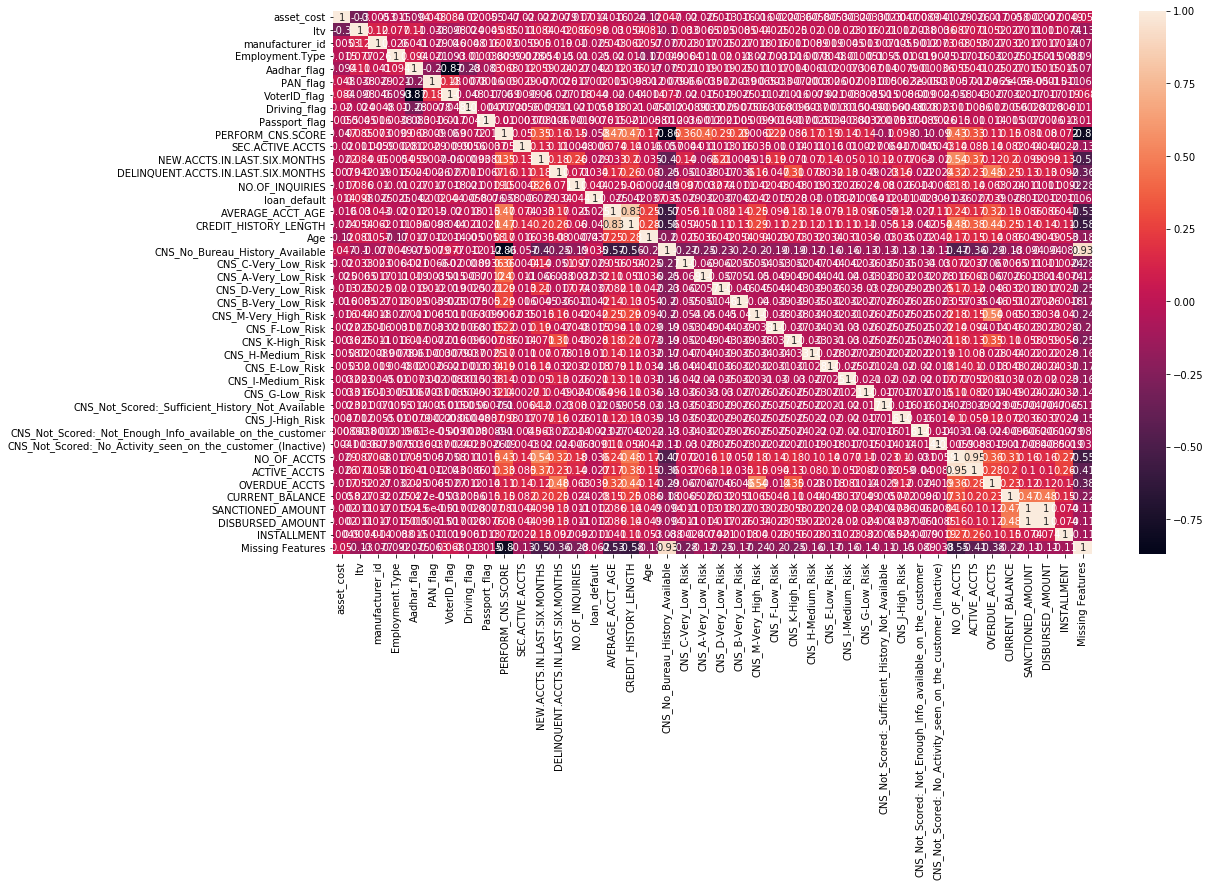

In [45]:
plt.figure(figsize=(17,10))
sns.heatmap(bf_all.corr(),annot=True)

In [ ]:
#Dealing with outliers. Instead of using popular methods
# i'll  try to preserve the outlier records instead of removing them. 
#i'll use RobustScaler to bring the observations closer to the median value (here, zero in those credit history columns).


In [46]:
from sklearn.preprocessing import  RobustScaler
rob_scaler = RobustScaler()

bf_all[nums] = rob_scaler.fit_transform(bf_all[nums])

In [47]:
y=bf_all.loan_default
X=bf_all.drop("loan_default",axis=1)
from sklearn.model_selection import train_test_split,KFold,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [48]:
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

In [49]:
X_train.shape

(255574, 41)

In [50]:
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(criterion='entropy',random_state=0),
    DecisionTreeClassifier(criterion='gini',random_state=0),
    RandomForestClassifier(n_estimators=100),
    GaussianNB(),
    BaggingClassifier(random_state=0),
    AdaBoostClassifier(),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.2,
                  n_estimators=100, max_depth=3)
]

In [51]:
results = []
for item in classifiers:
    print(item,"\n")
    clf = item
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    #print(y_pred)
    #results.append(accuracy_score(y_test,y_pred))
    results.append(y_pred)
    print("accuracy train:",clf.score(X_train,y_train),"\n")
    print("accuracy test:",clf.score(X_test,y_test),"\n")
    print("precision :",precision_score(y_test,y_pred),"\n")
    print('Recall score:',recall_score(y_test,y_pred),'\n')
    print("f1 score:",f1_score(y_test,y_pred),"\n")
    from sklearn.metrics import classification_report
    print(classification_report(y_test,y_pred))
    print("-------------------------------------------------------------------------------------------------------")

LogisticRegression() 

accuracy train: 0.5975373081768881 

accuracy test: 0.5886313923399145 

precision : 0.2818132168214091 

Recall score: 0.5774471726680271 

f1 score: 0.37877283129668815 

              precision    recall  f1-score   support

           0       0.83      0.59      0.69     54756
           1       0.28      0.58      0.38     15191

    accuracy                           0.59     69947
   macro avg       0.56      0.58      0.54     69947
weighted avg       0.71      0.59      0.62     69947

-------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(criterion='entropy', random_state=0) 

accuracy train: 1.0 

accuracy test: 0.9744663816889931 

precision : 0.9338468509288627 

Recall score: 0.9497070633927984 

f1 score: 0.941710182767624 

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     54756
           1       0.93      0.95      0.94   

In [52]:
xgb=XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.2,
                  n_estimators=250, max_depth=3)

In [53]:
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)

In [54]:
print("accuracy train:",xgb.score(X_train,y_train),"\n")
print("accuracy test:",xgb.score(X_test,y_test),"\n")
print("precision :",precision_score(y_test,y_pred),"\n")
print("Recall :",recall_score(y_test,y_pred),"\n")
print("f1 score:",f1_score(y_test,y_pred),"\n")
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))


accuracy train: 0.9899324657437768 

accuracy test: 0.9891632235835705 

precision : 0.9855998923356436 

Recall : 0.9641893226252386 

f1 score: 0.9747770531079463 

Confusion Matrix 
 [[54542   214]
 [  544 14647]]


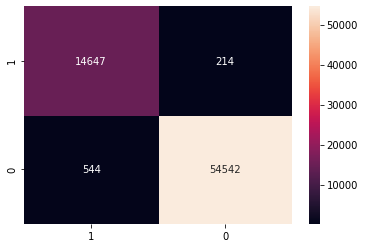

In [55]:
ax = sns.heatmap(confusion_matrix(y_test,y_pred).T,annot=True,fmt='2')
ax.invert_yaxis()
ax.invert_xaxis()

In [56]:
import sklearn.metrics as metrics

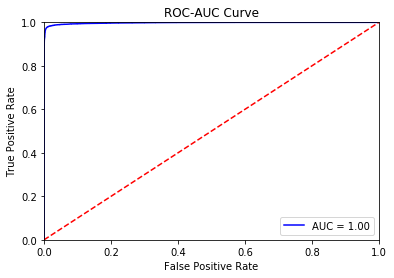

In [57]:
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC-AUC Curve')
plt.show()

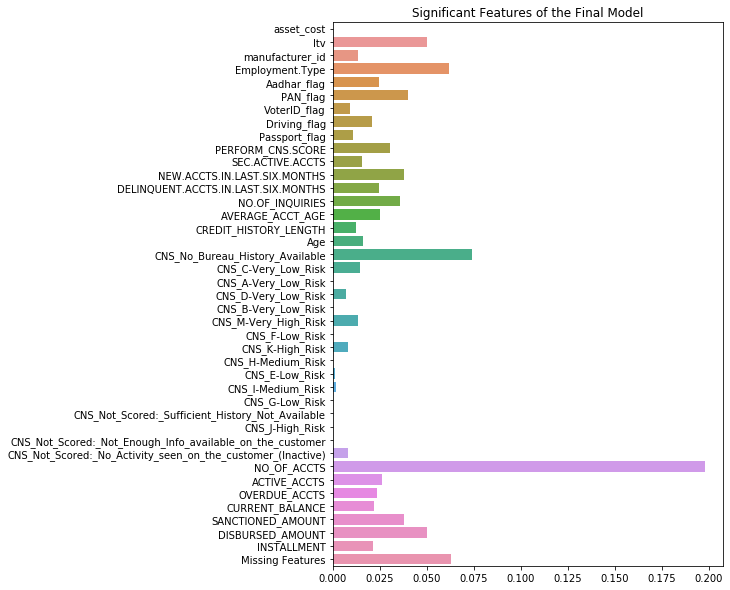

In [58]:
plt.figure(figsize=(7,10))
sns.barplot(x=xgb.feature_importances_,y=X.columns)
plt.title('Significant Features of the Final Model')
plt.show()

In [59]:
bf_all['Missing Features'].value_counts(normalize=True)

34   0.23009
35   0.18355
25   0.09365
24   0.08800
26   0.07647
33   0.07453
23   0.05632
27   0.05310
28   0.04467
29   0.03570
22   0.02475
30   0.01742
32   0.00838
21   0.00773
31   0.00385
20   0.00159
19   0.00018
18   0.00001
Name: Missing Features, dtype: float64